In [455]:
import numpy as np
import pandas as pd
import os
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from sklearn import tree
from IPython. display import Image as PImage 
from subprocess import check_call 
from PIL import Image, ImageDraw, ImageFont 
import re 
import pydotplus

In [456]:
df = pd.read_csv('HR Employee Attrition.csv',na_values= "?")
df.head(25)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [457]:
seed = 0
parameter = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True,
    'max_features': 0.3,
    'max_depth': 9 ,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': seed,
    'verbose': 0 
}

In [458]:
df = df[['Attrition',
        'Age',
        'BusinessTravel',
        'DailyRate',
        'Department',                    
        'DistanceFromHome',
        'Education',
        'EducationField',
        'EmployeeCount',
        'EmployeeNumber',
        'EnvironmentSatisfaction',
        'Gender',
        'HourlyRate',
        'JobInvolvement',
        'JobLevel',
        'JobRole',
        'JobSatisfaction',
        'MaritalStatus',
        'MonthlyIncome',
        'MonthlyRate',
        'NumCompaniesWorked',
        'Over18',
        'OverTime',
        'PercentSalaryHike',
        'PerformanceRating',
        'RelationshipSatisfaction',
        'StandardHours',
        'StockOptionLevel',
        'TotalWorkingYears',
        'TrainingTimesLastYear',
        'WorkLifeBalance',
        'YearsAtCompany',
        'YearsInCurrentRole',
        'YearsSinceLastPromotion',
        'YearsWithCurrManager']]

In [459]:
dataset = df.drop(['EmployeeCount'], axis = 1)
dataset = dataset.drop(['StandardHours'], axis = 1)
dataset = dataset.drop(['Over18'], axis = 1)
dataset = dataset.drop(['EmployeeNumber'], axis = 1)
dataset = dataset.drop(['PerformanceRating'], axis = 1)

In [460]:
dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2


In [461]:
X = dataset.iloc[:,1:]
y = dataset.iloc[:, 0]
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,11,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,23,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,15,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,11,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,12,4,1,6,3,3,2,2,2,2


In [462]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [463]:
X = pd.get_dummies(X)
X.shape

(1470, 50)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [465]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [466]:
dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20

seed = 0


In [467]:
rf = RandomForestClassifier(**parameter)

In [468]:
rf = rf.fit(X_train, y_train)

In [469]:
rf_predictions = rf.predict(X_test)

In [470]:
accuracy_score(y_test, rf_predictions)

0.8809523809523809

In [471]:
confusion_matrix(y_test, rf_predictions)

array([[253,   0],
       [ 35,   6]])

In [472]:
f1_score(y_test, rf_predictions, pos_label='No')


0.9353049907578558

In [473]:
precision_score(y_test, rf_predictions, pos_label='No')

0.8784722222222222

In [474]:
py.init_notebook_mode(connected=True)

trace = go. Scatter(
    y = rf. feature_importances_,
    x = X. columns. values,
    #x = attrition_final. columns. values,

    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 6,
        color = rf.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = X. columns. values
)
data = [trace]

layout  = go.Layout(
    autosize= True,
    title='Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
        ticklen= 5,
        showgrid=False,
       zeroline=False, 
       showline=False
    ),
   yaxis=dict(
        title= 'Feature Importance',
        showgrid=False, zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend = False
)
fig = go.Figure (data = data, layout = layout)
py.iplot(fig,filename = 'scatter2010')

In [475]:

decision_tree = tree.DecisionTreeClassifier (max_depth = 4)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict (X_test)

with open("tree1.dot",'w') as f:
    f= tree.export_graphviz(decision_tree,
                                out_file = f,
                                max_depth = 4,
                                impurity = False,
                                feature_names = X. columns. values,
                                class_names = ['No', 'Yes'],
                                rounded = True,
                                filled = True )

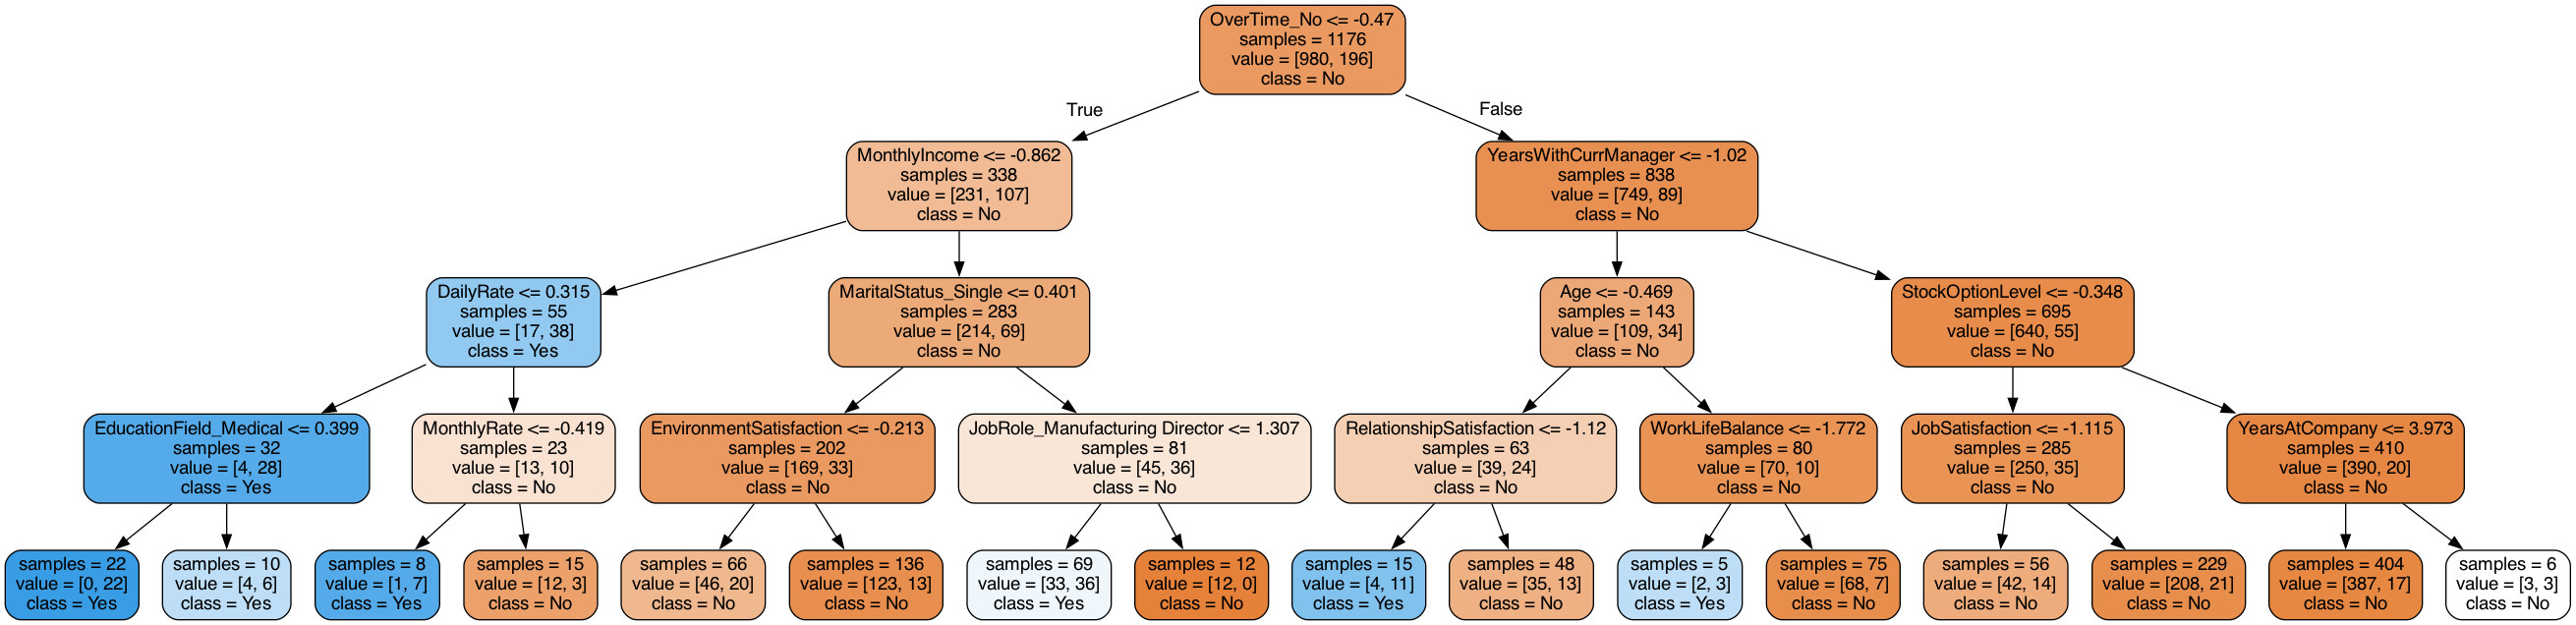

In [476]:
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save ('sample-out.png')
PImage ("sample-out.png")